# Decision Tree Regressor

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # for dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score # for accuracy Score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.DataFrame(data=fetch_california_housing().data , columns=fetch_california_housing().feature_names)

In [28]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
# segregating my data to dependent and independent features
X =df
y = fetch_california_housing().target

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33,random_state=100)

In [31]:
X_train.shape,y_train.shape,y_test.shape,X_train.shape

((13828, 8), (13828,), (6812,), (13828, 8))

In [32]:
y_test

array([2.453, 1.042, 1.462, ..., 3.685, 0.593, 1.721])

In [33]:
# appliying Algorithm
regressor_tree = DecisionTreeRegressor()
regressor_tree

DecisionTreeRegressor()

In [34]:
regressor_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred = regressor_tree.predict(X_test)

In [36]:
Acc_r2_score = r2_score(y_test,y_pred) 
print(Acc_r2_score)
accAdjusted_r2_score =  1-(1-Acc_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(accAdjusted_r2_score)

0.6264167150941569
0.6259773991630608


### Hyper parameter tuning

In [37]:
parameters = {
    'criterion' :['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2'],
    'random_state' : range(1,100)
}


In [38]:
regressor = RandomizedSearchCV(estimator=regressor_tree,param_distributions=parameters,n_iter=10,scoring='neg_root_mean_squared_error',random_state=10)

In [39]:
regressor.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'random_state': range(1, 100),
                                        'splitter': ['best', 'random']},
                   random_state=10, scoring='neg_root_mean_squared_error')

In [40]:
regressor.best_params_

{'splitter': 'best',
 'random_state': 79,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'squared_error'}

In [41]:
regressor_Random = DecisionTreeRegressor(criterion='squared_error',max_depth=3,splitter='best',max_features='auto',random_state=79)

In [42]:
regressor_Random.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=79)

In [43]:
y_pred_random = regressor_Random.predict(X_test)

In [45]:
Acc_r2_score = r2_score(y_test,y_pred_random) 
print(Acc_r2_score)
accAdjusted_r2_score =  1-(1-Acc_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(accAdjusted_r2_score)

0.5292938792513978
0.5287403515480333


In [53]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

[Text(0.5, 0.875, 'node #0\nMedInc <= 5.086\nsquared_error = 1.339\nsamples = 13828\nvalue = 2.078'),
 Text(0.25, 0.625, 'node #1\nMedInc <= 3.126\nsquared_error = 0.851\nsamples = 11004\nvalue = 1.752'),
 Text(0.125, 0.375, 'node #2\nAveOccup <= 2.159\nsquared_error = 0.591\nsamples = 5503\nvalue = 1.387'),
 Text(0.0625, 0.125, 'node #3\nsquared_error = 1.105\nsamples = 835\nvalue = 1.917'),
 Text(0.1875, 0.125, 'node #4\nsquared_error = 0.44\nsamples = 4668\nvalue = 1.292'),
 Text(0.375, 0.375, 'node #5\nAveOccup <= 2.404\nsquared_error = 0.843\nsamples = 5501\nvalue = 2.118'),
 Text(0.3125, 0.125, 'node #6\nsquared_error = 1.272\nsamples = 1367\nvalue = 2.821'),
 Text(0.4375, 0.125, 'node #7\nsquared_error = 0.485\nsamples = 4134\nvalue = 1.886'),
 Text(0.75, 0.625, 'node #8\nMedInc <= 7.399\nsquared_error = 1.222\nsamples = 2824\nvalue = 3.345'),
 Text(0.625, 0.375, 'node #9\nAveOccup <= 2.743\nsquared_error = 0.938\nsamples = 2157\nvalue = 3.013'),
 Text(0.5625, 0.125, 'node #10\n

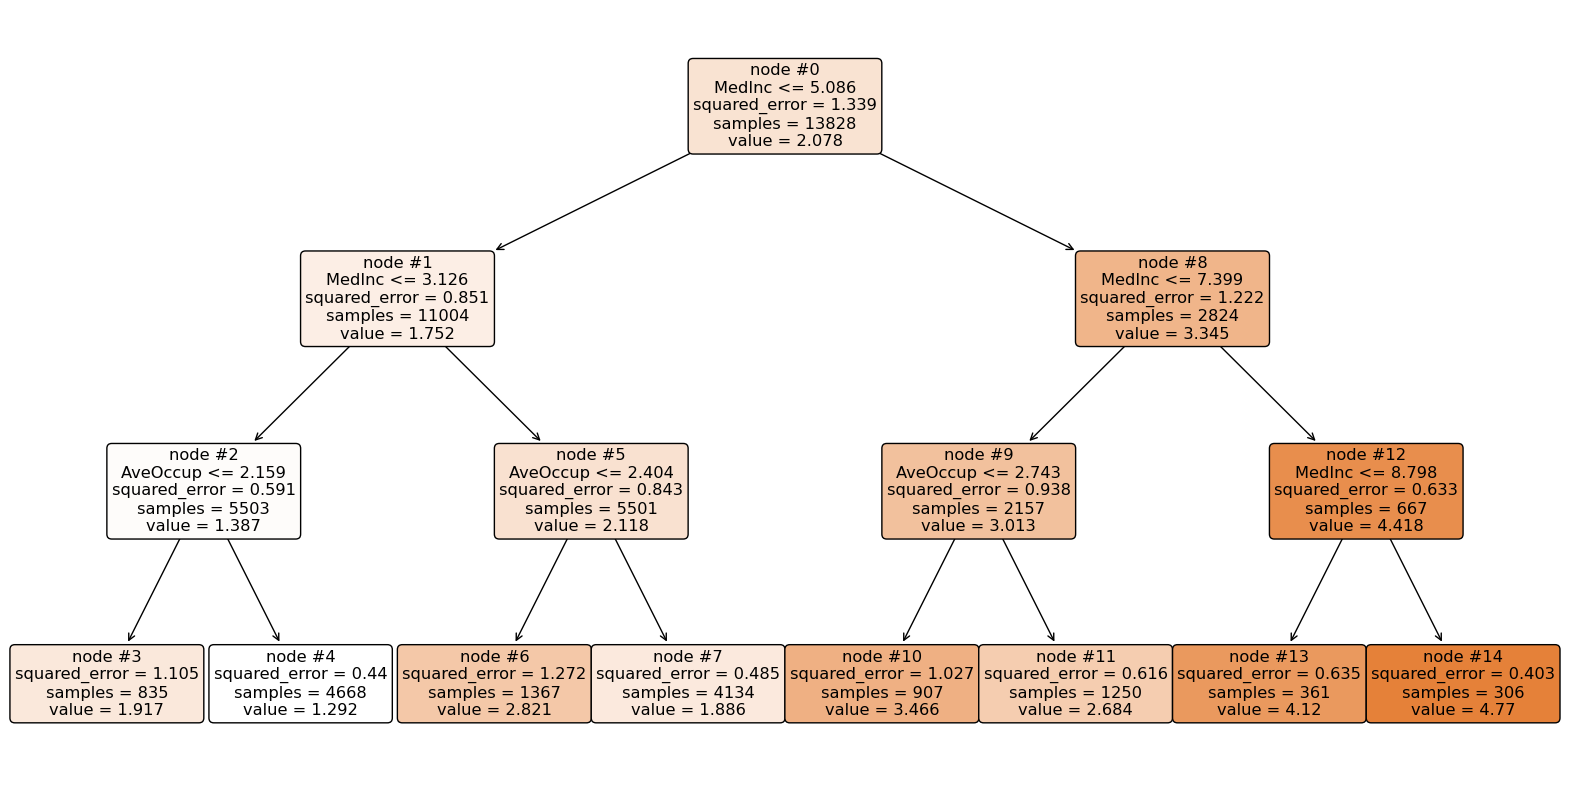

In [56]:
plt.figure(figsize=(20,10))
tree.plot_tree(regressor_Random,node_ids=True,rounded=True,filled=True,
               feature_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
       )